# Logistic Regression

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, precision_recall_fscore_support

## Loading Wine Dataset and creating dataframe

In [2]:
wine = datasets.load_wine()

features = pd.DataFrame(wine.data, columns=wine.feature_names)
target = wine.target

df_wine = features.copy()
df_wine['target'] = target.copy()

target_names = wine.target_names

features.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Through the info() function we can see that there are no null elements in any column, and all are of the type float.

In [3]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

## Visualising how the data is divided between the 3 classes

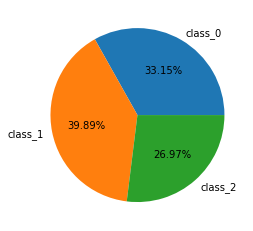

In [4]:
classes = df_wine.groupby('target')['target'].count()

plt.pie(classes, labels=target_names, autopct='%.2f%%')
plt.show()

## Standardising the Data

In [5]:
standardized = scale(features)
df_std = pd.DataFrame(standardized, columns=features.columns)
df_std['target'] = target.copy() 
df_std.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000
mean,7.841418e-15,2.444986e-16,-4.059175e-15,-7.110417e-17,-2.494883e-17,-1.955365e-16,9.443133e-16,-4.178929e-16,-1.540590e-15,-4.129032e-16,1.398382e-15,2.126888e-15,-6.985673e-17,0.938202
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,0.775035
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00,0.000000
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01,0.000000
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01,1.000000
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01,2.000000
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00,2.000000


### Checking correlation with the TARGET and selecting highly correlated ones.

<AxesSubplot:>

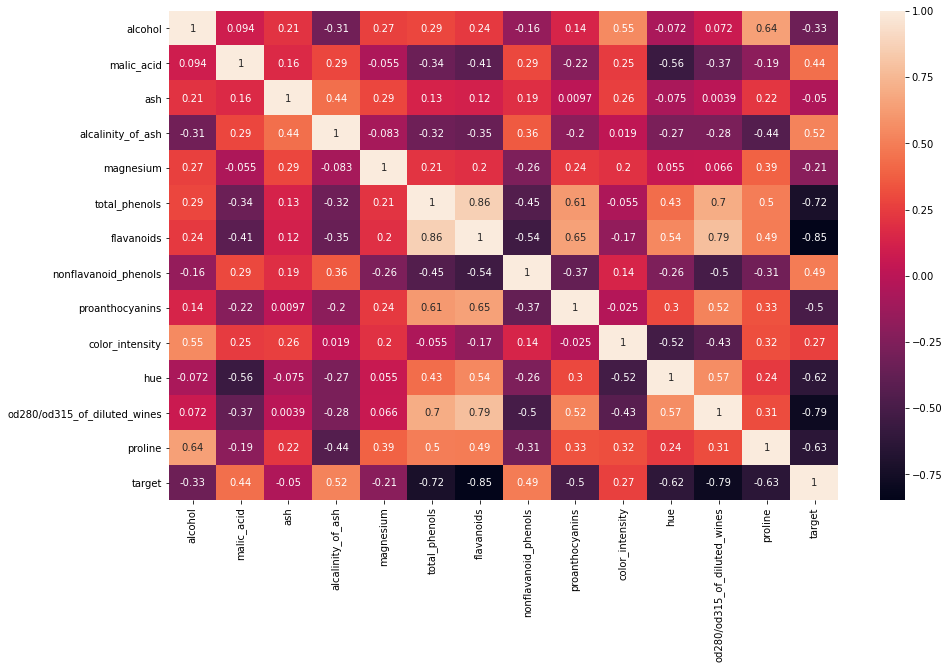

In [6]:
cmat = df_std.corr()
fig, axs = plt.subplots(nrows=1)
fig.set_size_inches(15, 9)
sns.heatmap(cmat, annot=True)

### Checking Multicolinearity between selected columns

<AxesSubplot:>

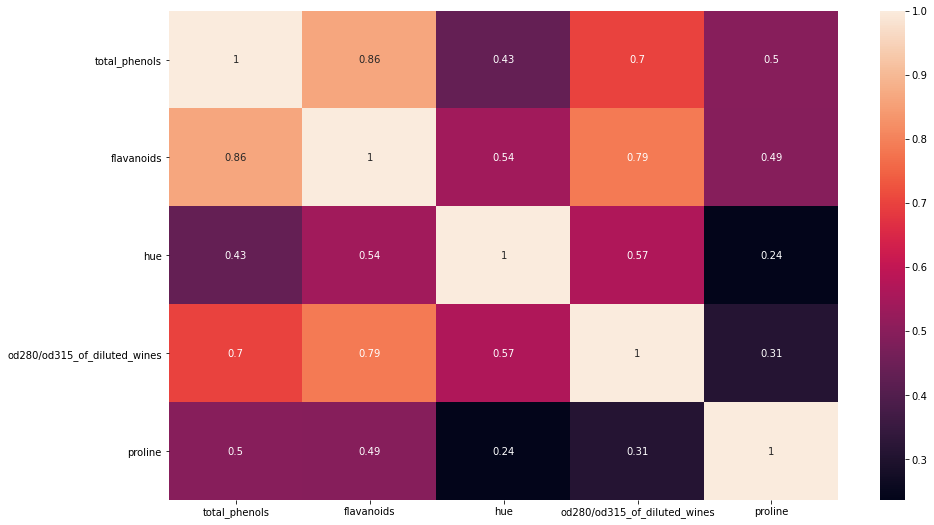

In [7]:
df_intermediate = df_std[['total_phenols', 'flavanoids', 'hue', 'od280/od315_of_diluted_wines', 'proline']]

cmat = df_intermediate.corr()
fig, axs = plt.subplots(nrows=1)
fig.set_size_inches(15, 9)
sns.heatmap(cmat, annot=True)

### Dropping 'total_phenols' column since it is highly correlated with 'flavanoids' and 'od280/od315_of_diluted_wines'

In [8]:
df_final = df_std[['hue', 'od280/od315_of_diluted_wines', 'proline', 'target']]

## Visualisations over the 3 classes for each selected attribute

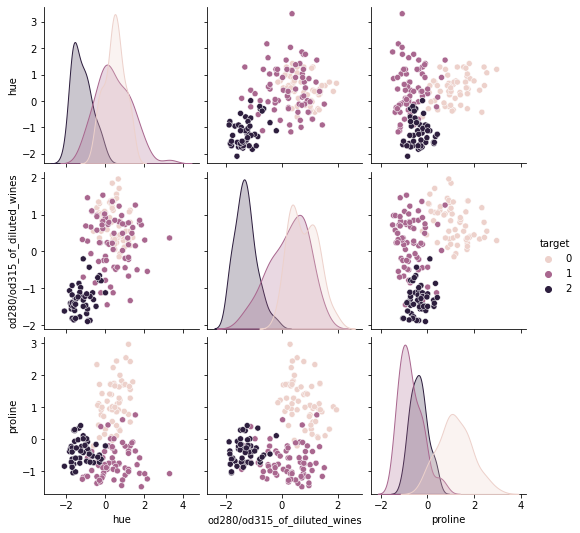

In [9]:
sns.pairplot(df_final, hue='target')

## Distributions

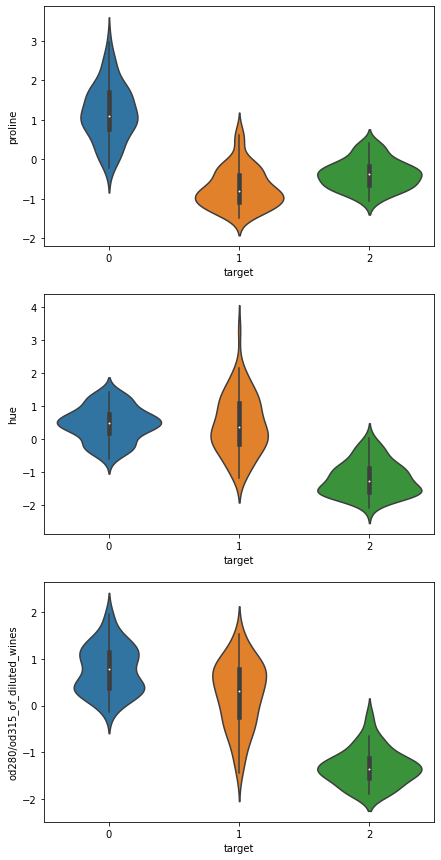

In [10]:
fig, axs = plt.subplots(nrows=3)
fig.set_size_inches(7, 15)
# p1 = sns.violinplot(x='target', y='flavanoids', data=df_final, ax=axs[0])
p2 = sns.violinplot(x='target', y='hue', data=df_final, ax=axs[1])
p3 = sns.violinplot(x='target', y='od280/od315_of_diluted_wines', data=df_final, ax=axs[2])
p4 = sns.violinplot(x='target', y='proline', data=df_final, ax=axs[0])

## Tain-Test Split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df_final.loc[:, df_final.columns != 'target'], target, test_size=0.1, random_state=0)

## Creating and training Logistic Regression Model

In [12]:
model = LogisticRegression()
model.fit(x_train, y_train)

print('Model Coefficient : \n', model.coef_)
print('MOdel Intercept : ', model.intercept_)

Model Coefficient : 
 [[ 0.11145796  1.41335974  1.92776915]
 [ 1.16969752  0.36312439 -1.78417496]
 [-1.28115548 -1.77648413 -0.1435942 ]]
MOdel Intercept :  [ 0.04744672  0.88420744 -0.93165416]


## Testing the model

In [13]:
y_predicted = model.predict(x_test)

## Error and Metrics

### MAS, MSE, RMSE

In [14]:
MAE = mean_absolute_error(y_test, y_predicted)
print('MAE  : ', MAE)
MSE = mean_squared_error(y_test, y_predicted)
print('MSE  : ', MSE)
RMSE = np.sqrt(mean_squared_error(y_test, y_predicted))
print('RMSE : ', RMSE)

MAE  :  0.0
MSE  :  0.0
RMSE :  0.0


### Confusion Matrix

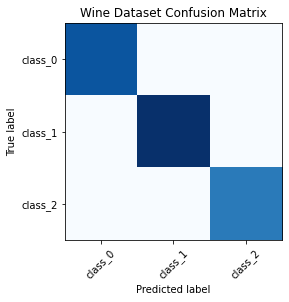

In [15]:
cm = confusion_matrix(y_test, y_predicted)

tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.tight_layout
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Wine Dataset Confusion Matrix')
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.show()

### Accuracy Precision Recall and F-Score

In [16]:
accuracy = accuracy_score(y_test, y_predicted)
print('Model accuracy : ', accuracy)

metric_score = precision_recall_fscore_support(y_test, y_predicted, average='macro')

metric_name = ['precision', 'recall', 'fscore']

for i in range(0, 3):
    print('Model ' + metric_name[i] + ' : ' + str(metric_score[i]))

Model accuracy :  1.0
Model precision : 1.0
Model recall : 1.0
Model fscore : 1.0
